In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import pearsonr
import sys
sys.path.append('../')
from helpers import *
from analysis_helper import *
import seaborn as sns

In [2]:
data_path = './../../../data'
advocate_dir = os.path.join(data_path, 'BeerAdvocate')
exp_categories = get_exp_categories(data_path) + ['expertness_score']
rev_with_scores = pd.read_pickle(os.path.join(advocate_dir, 'rev_w_scores.pkl'))
rev_with_scores['date'] = pd.to_datetime(rev_with_scores['date'])

adv_beers = pd.read_csv(os.path.join(advocate_dir, 'beers_BA_clean.csv'))
users = pd.read_csv(os.path.join(advocate_dir, 'users_BA_clean.csv'))

In [ ]:

scores_for_beer = get_scores_for_beers(rev_with_scores, exp_categories)


In [ ]:
scores_for_beer

review_count    flavor            mouthfeel             brewing  \
               count      mean        std      mean       std      mean   
beer_id                                                                   
3                  3  4.666667   0.577350  2.000000  1.000000  1.666667   
4                 10  4.600000   2.503331  3.000000  1.154701  1.700000   
5                543  2.661142   1.781232  1.797422  1.318137  1.134438   
6               1019  4.253189   2.245860  1.997056  1.448864  1.074583   
7                811  1.861899   1.549406  1.596794  1.366780  1.076449   
...              ...       ...        ...       ...       ...       ...   
292902             2  5.500000   0.707107  4.000000  1.414214  1.500000   
292909             2  5.000000   1.414214  3.000000  1.414214  1.000000   
292983             2  7.500000  10.606602  2.000000  2.828427  0.500000   
292990             3  1.333333   2.309401  0.333333  0.577350  1.333333   
293279             2  7.000000   0.000000  4.000000  0.000000  1.500000   

                  technical           appearance           off_flavors  \
              std      mean       std       mean       std        mean   
beer_id                                                                  
3        0.577350  1.666667  0.577350   2.000000  1.000000    0.000000   
4        1.059350  1.500000  1.269296   3.200000  1.686548    0.600000   
5        0.856046  1.132597  1.215257   2.267035  1.251036    0.198895   
6        0.842354  1.091266  1.183761   2.409225  1.491414    0.197252   
7        0.923801  0.890259  1.091625   1.875462  1.309237    0.246609   
...           ...       ...       ...        ...       ...         ...   
292902   0.707107  2.500000  0.707107   2.000000  0.000000    0.500000   
292909   0.000000  1.500000  0.707107   1.500000  0.707107    0.500000   
292983   0.707107  0.500000  0.707107   2.000000  1.414214    0.000000   
292990   0.577350  1.000000  0.000000   0.333333  0.577350    0.000000   
293279   0.707107  3.000000  0.000000   3.500000  2.121320    0.000000   

                  expertness_score             
              std             mean        std  
beer_id                                        
3        0.000000        12.000000   3.000000  
4        0.699206        14.600000   5.081557  
5        0.459663         9.191529   4.369907  
6        0.459940        11.022571   5.044447  
7        0.531337         7.547472   4.128032  
...           ...              ...        ...  
292902   0.707107        16.000000   1.414214  
292909   0.707107        12.500000   2.121320  
292983   0.000000        12.500000  16.263456  
292990   0.000000         4.333333   3.214550  
293279   0.000000        19.000000   1.414214  

[93763 rows x 15 columns]

In [ ]:
scores_for_beer.isnull().values.any()

False

In [ ]:
mean_scores_beer = get_mean_scores_beer(rev_with_scores, exp_categories)
complete_beer = pd.merge(adv_beers, mean_scores_beer, on='beer_id')

In [4]:
mean_scores_beer = get_mean_scores_beer(rev_with_scores, exp_categories)
complete_beer = pd.merge(adv_beers, mean_scores_beer[mean_scores_beer['review_count']>=10], on='beer_id')

In [6]:
beer_gr =  get_beer_gr(complete_beer, exp_categories)
beer_gr

,flavor,mouthfeel,brewing,technical,appearance,off_flavors,expertness_score
style,,,,,,,
Altbier,3.785373,2.265867,1.389616,1.524684,2.381224,0.265196,11.611961
American Adjunct Lager,1.279126,1.780614,1.232772,0.967639,1.953162,0.454183,7.667496
American Amber / Red Ale,3.860798,2.120267,1.445304,1.399012,2.390619,0.241938,11.457937
American Amber / Red Lager,2.954901,1.986644,1.348951,1.306196,2.238239,0.288806,10.123738
American Barleywine,5.096560,2.459319,1.248720,1.486584,2.258228,0.328777,12.878188
...,...,...,...,...,...,...,...
Vienna Lager,2.956455,2.022911,1.364357,1.402243,2.251793,0.271709,10.269468
Weizenbock,4.992537,2.429359,1.142181,1.469734,2.392342,0.330852,12.757005
Wheatwine,4.974530,2.437351,1.366425,1.422289,2.136496,0.372200,12.709291


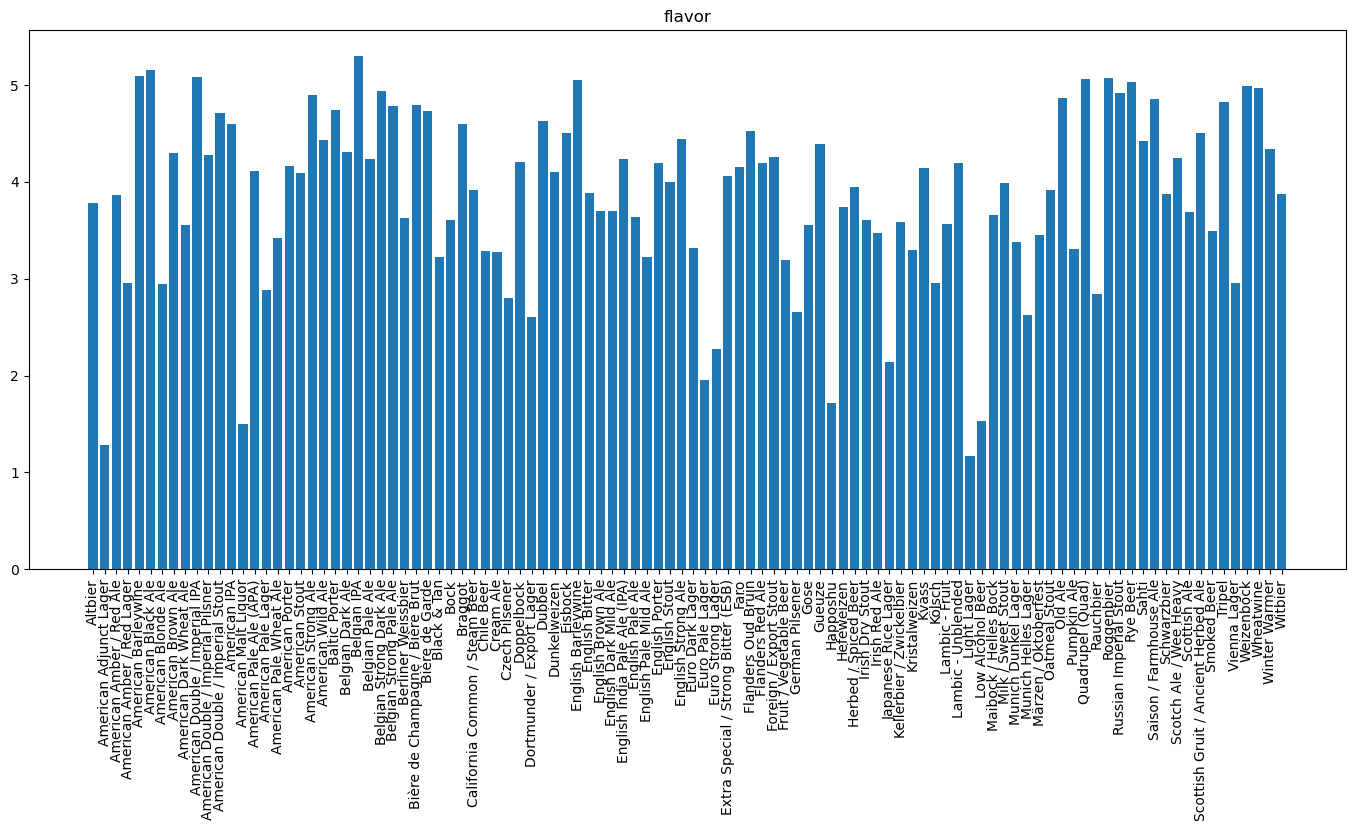

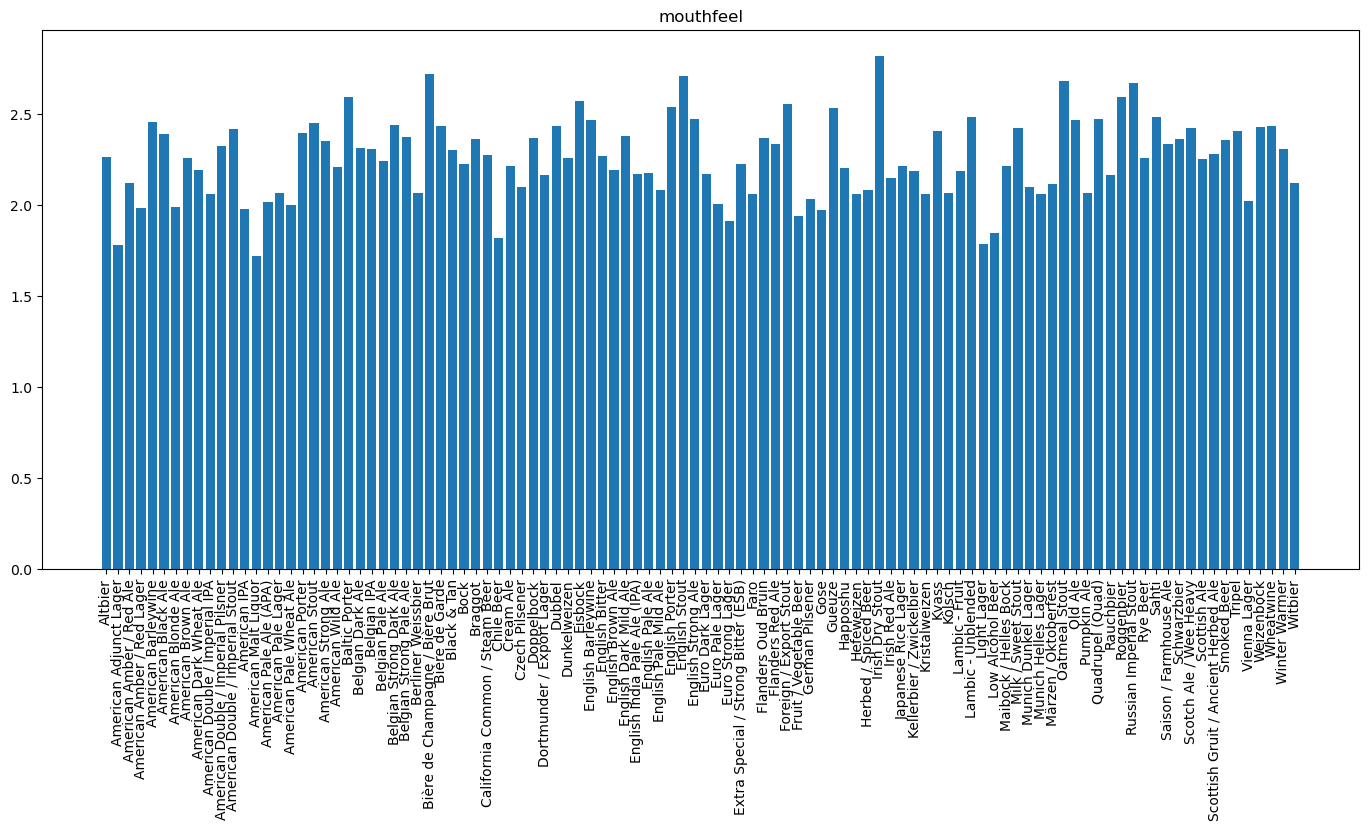

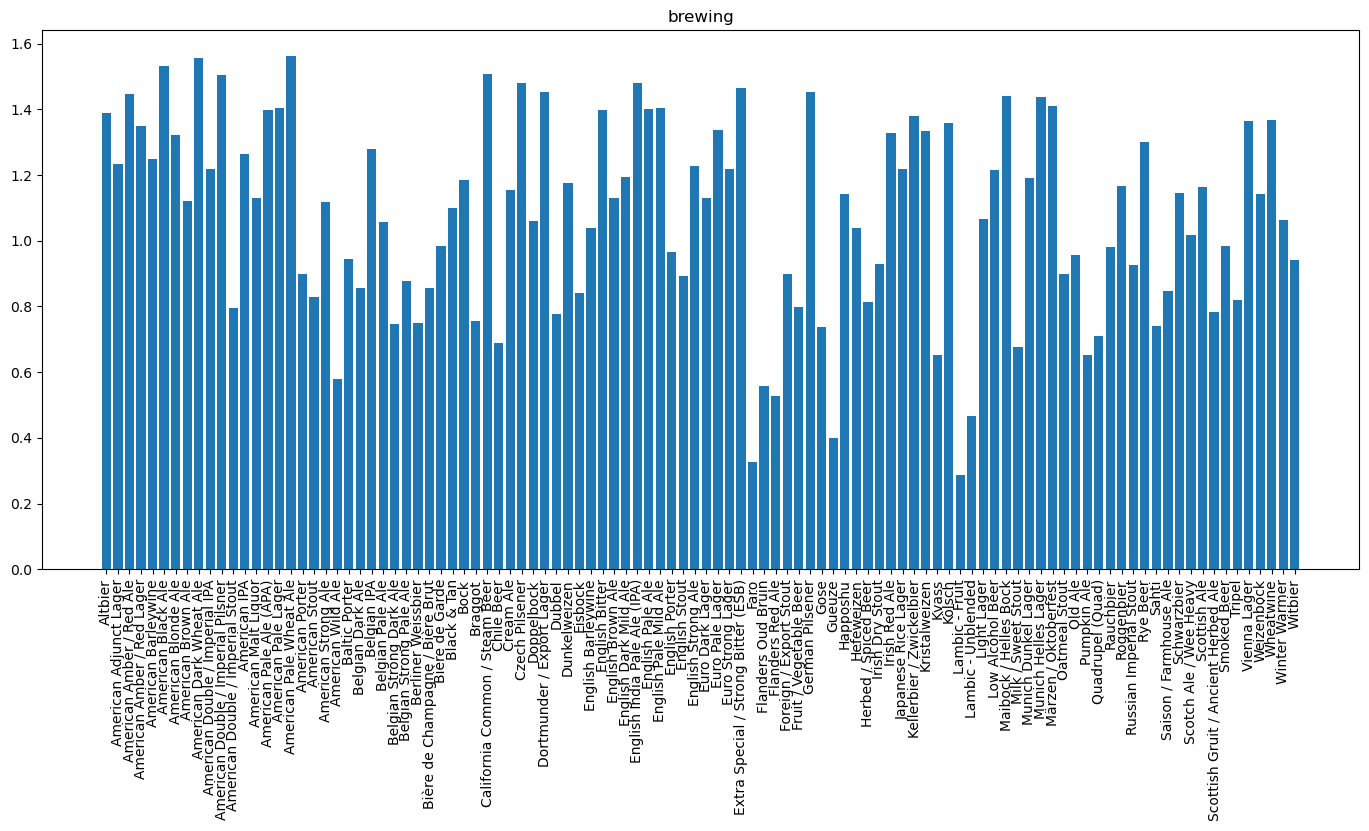

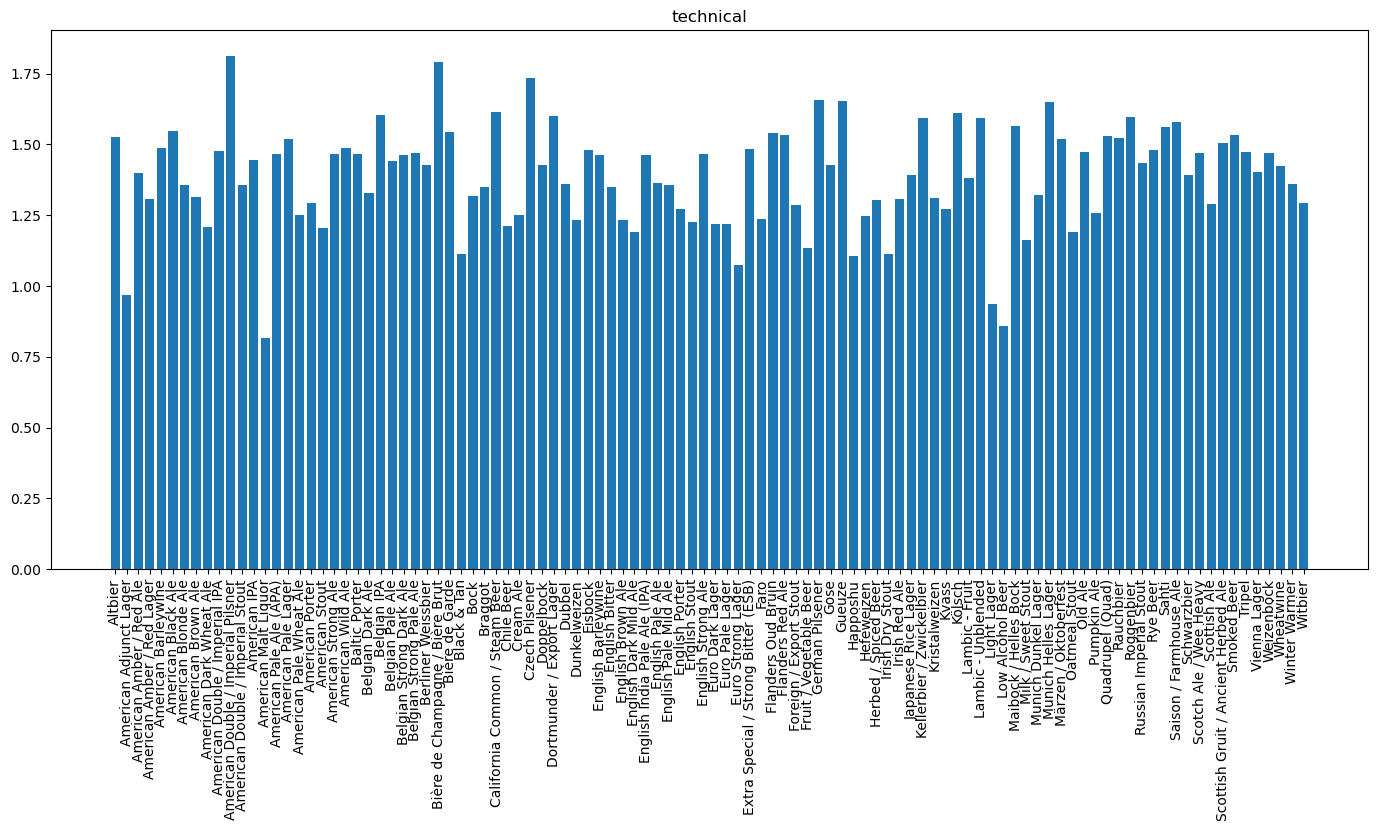

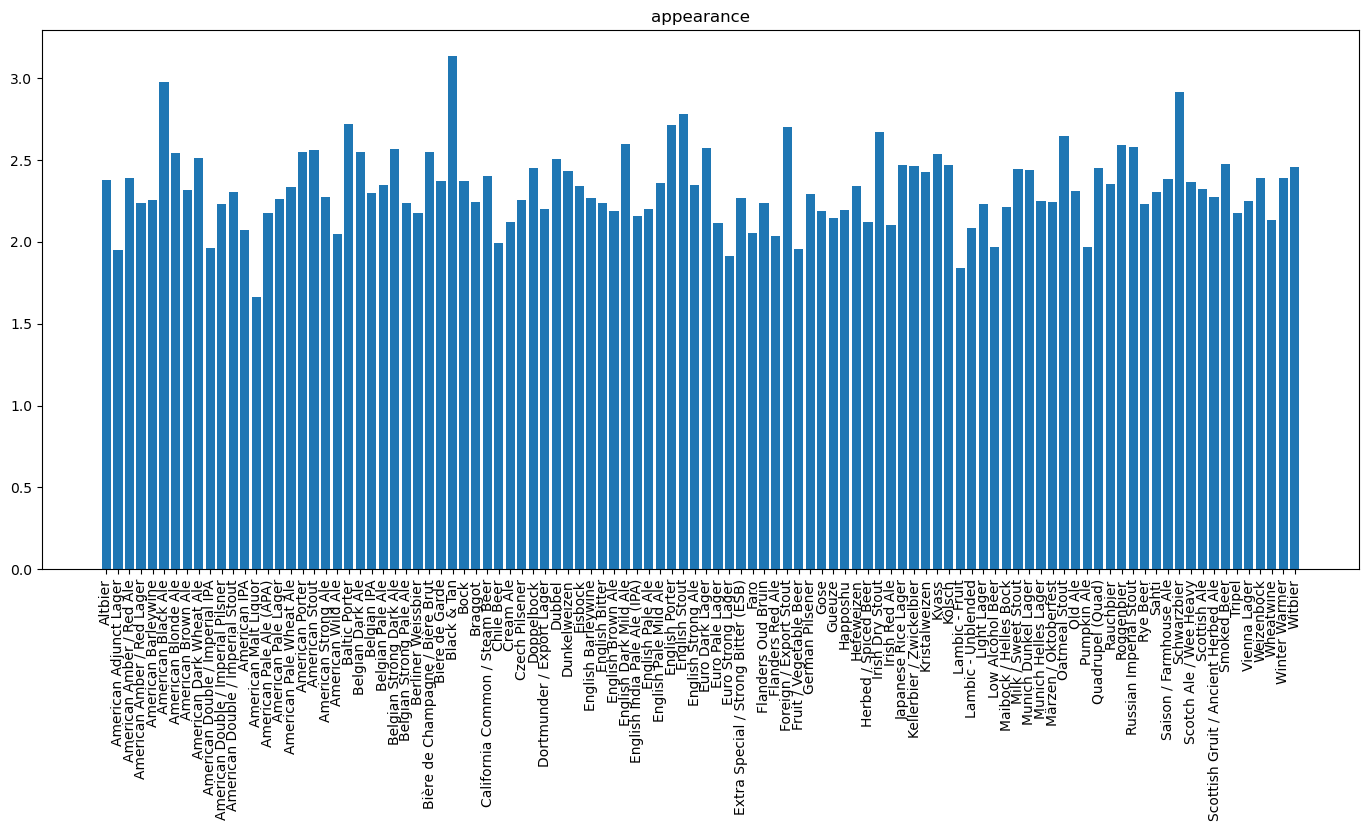

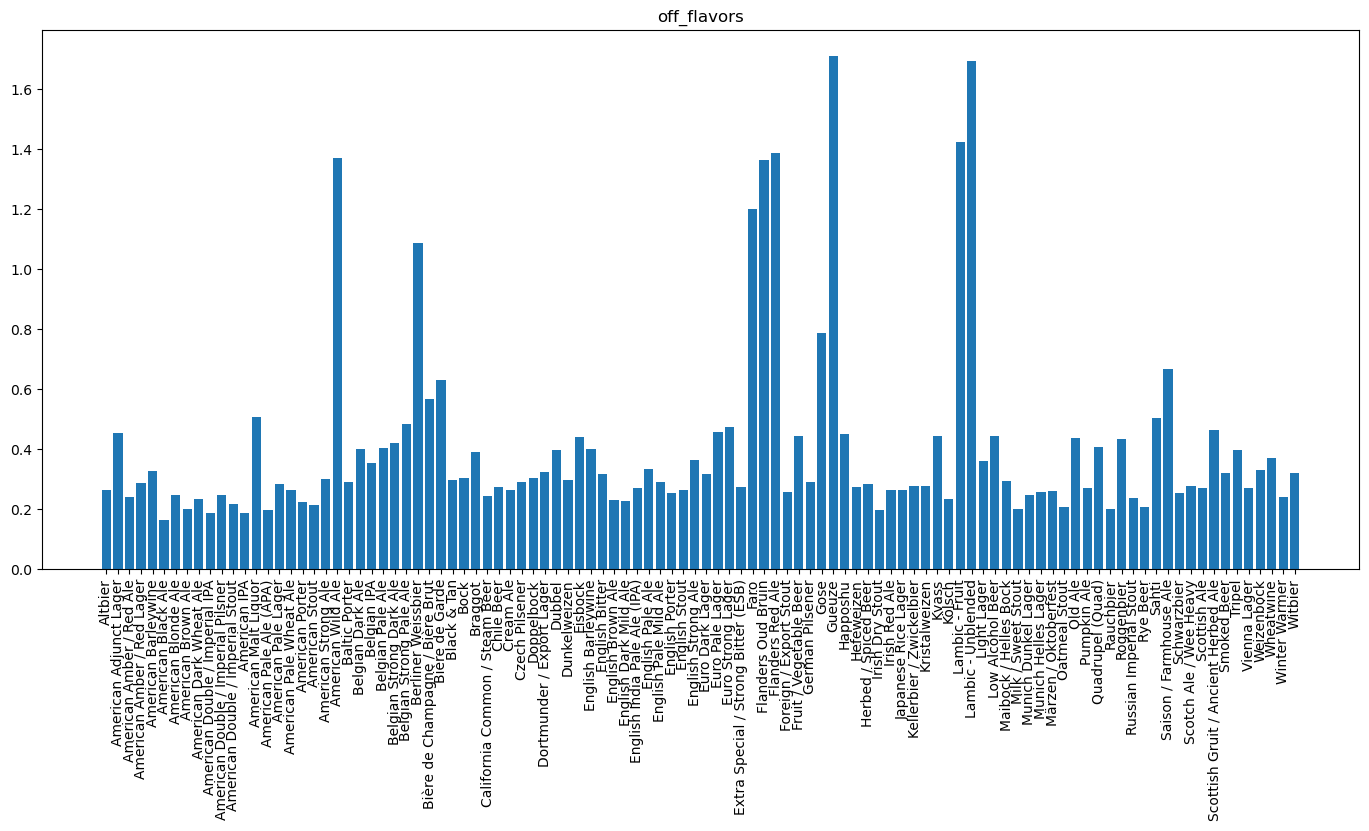

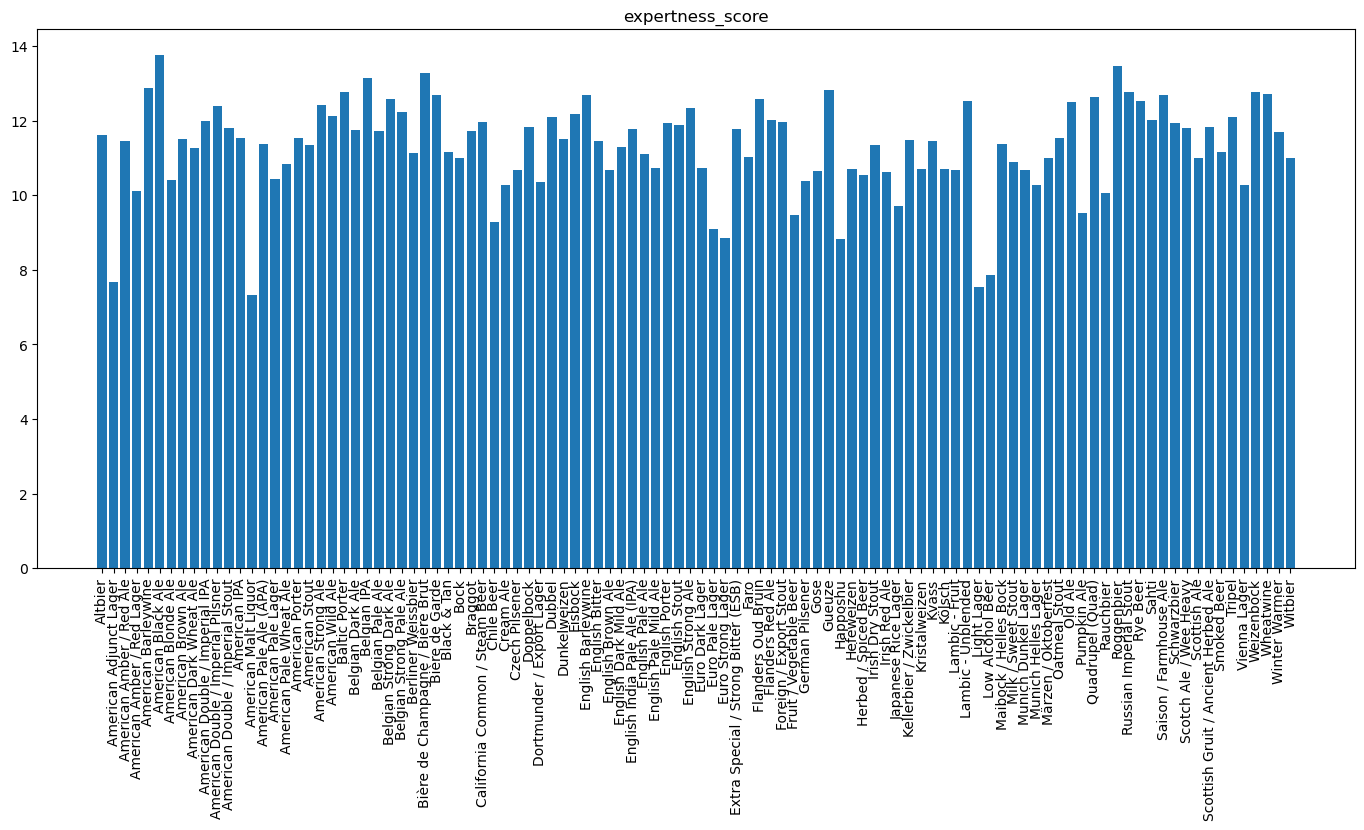

In [7]:
for col in exp_categories:    
    fig  = plt.figure(figsize=(17,7))
    plt.bar(beer_gr.index, beer_gr[col])
    plt.title(col)

    plt.xticks(rotation=90)
    plt.show()

In [9]:
mean_scores_beer['review_count'].corr(mean_scores_beer['expertness_score'])

0.020931297040495574

<Axes: >

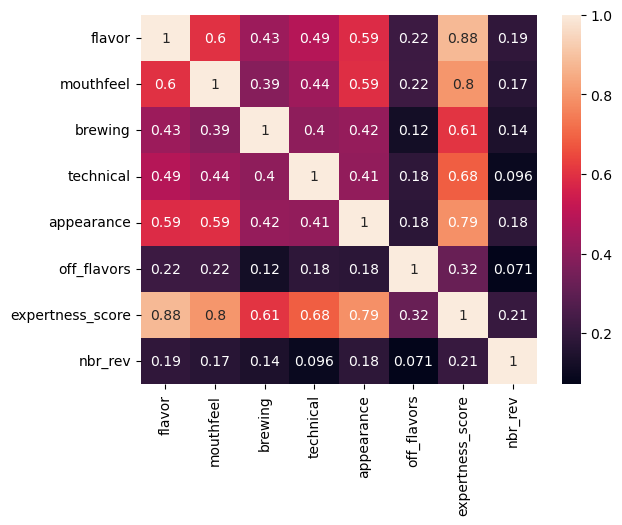

In [10]:
users_stats = get_users_stats(rev_with_scores, exp_categories)
for_corr = exp_categories + ['nbr_rev']
sns.heatmap(users_stats[for_corr].corr(), annot=True)

<Axes: >

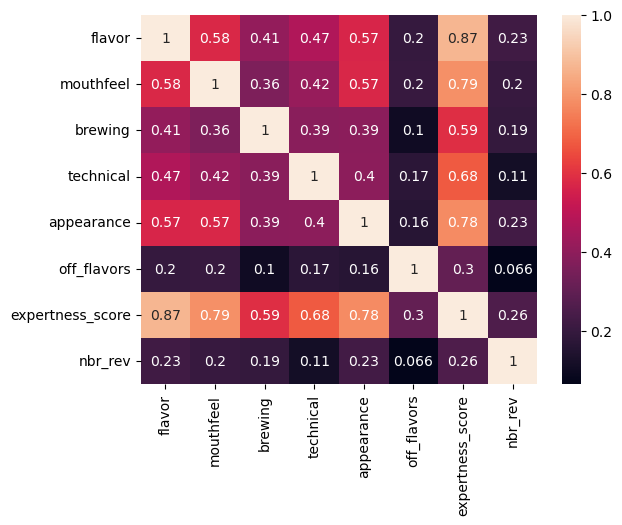

In [11]:
sns.heatmap(users_stats[users_stats['nbr_rev']<200][for_corr].corr(), annot=True)

In [12]:
pearsonr(users_stats['expertness_score'], users_stats['nbr_rev'])

PearsonRResult(statistic=0.2084933089630822, pvalue=0.0)

In [ ]:
# Normalizes review dates to the first review date for each user, setting their first review as day zero.
rev_zero_date= joined_date_zero(rev_with_scores)
# Standardize the reviews score through the mean and the std of the scores for that particular beer 
rev_std = standardize(rev_zero_date, scores_for_beer.reset_index(), exp_categories)

result = rev_std.groupby('user_id').apply(corr_and_count, include_groups=False)

result = result.dropna()
result

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pe

,correlation,p_value,total_count
user_id,,,
--dom--.709199,-0.429749,0.001321,53.0
-mk-.763762,-0.303799,0.464454,8.0
-rick.912339,0.266238,0.000175,194.0
-steve-.781156,0.354058,0.031562,37.0
007.8521,-0.198875,0.748464,5.0
...,...,...,...
zymurgylabs.718885,0.000000,1.000000,2.0
zymurgywhiz.265202,0.000000,1.000000,2.0
zythophile.1101219,0.151563,0.041677,181.0


In [ ]:
result[(result['total_count'] > 20) & (result['total_count'] < 500)]['correlation'].mean()

0.06257289946973467

In [ ]:
result['correlation'].mean()

0.035390309405985323

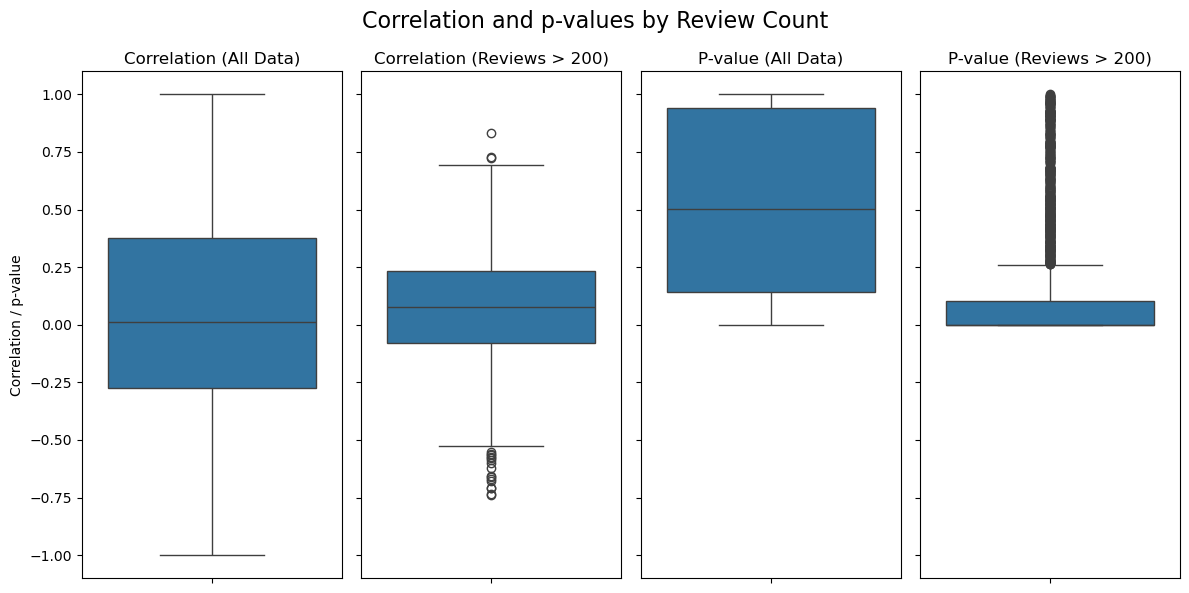

In [ ]:
plot_corr_and_pvalue(result)

In [ ]:
def review_of_experts(df, users, nbr_rev=100):
    x = df.merge(users[['user_id','nbr_ratings']], on='user_id')
    return x[x['nbr_ratings']>nbr_rev]

In [ ]:
len(users[users['nbr_ratings']>200])

5234

In [ ]:
rev_of_exp = review_of_experts(rev_with_scores, users, nbr_rev=200)
rev_of_exp = first_reviews(rev_of_exp, max=100)
rev_exp_zero_date= joined_date_zero(rev_of_exp)

rev_exp_std = standardize(rev_exp_zero_date, scores_for_beer.reset_index(), exp_categories)
result = rev_exp_std.groupby('user_id').apply(corr_and_count, include_groups=False)

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(group[att_1], group['date'].astype(int))
/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:138: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pe

In [ ]:
result = result.dropna()

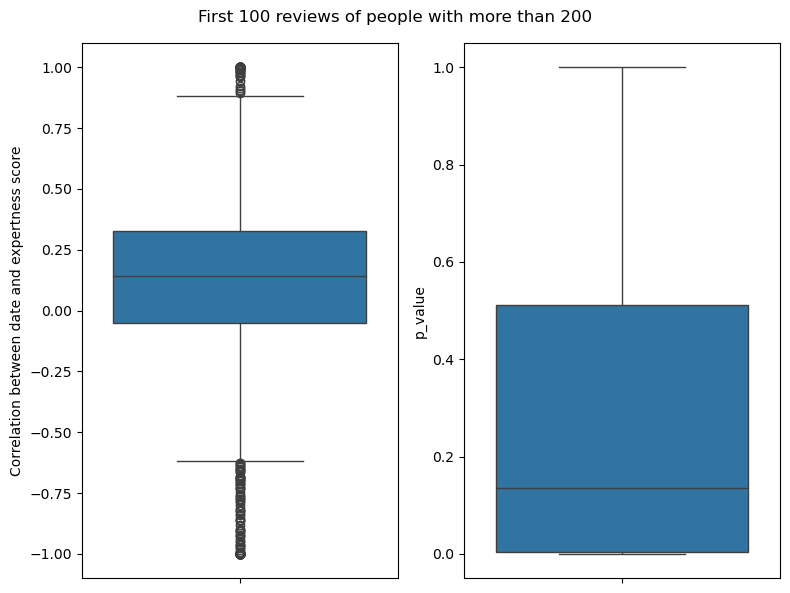

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6)) 

fig.suptitle('First 100 reviews of people with more than 200')

sns.boxplot(y=result['correlation'], ax=axes[0])

axes[0].set_ylabel("Correlation between date and expertness score")

sns.boxplot(y=result['p_value'], ax=axes[1])
axes[1].set_ylabel("p_value")

plt.tight_layout()  
plt.show()


In [ ]:
result['correlation'].mean()

0.12560090240522961

In [ ]:
rev_of_exp = review_of_experts(rev_with_scores, users, nbr_rev=200)
rev_of_exp = first_reviews(rev_of_exp, max=5)

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


Text(0.5, 1.0, 'Mean of the score (standardized) of the first 5 reviews of people with more than 200')

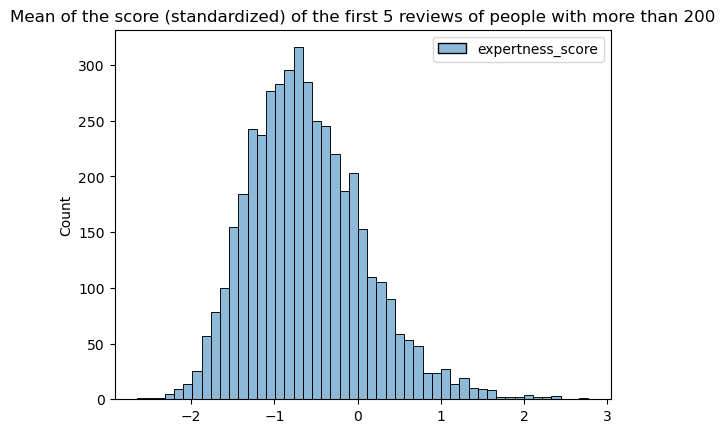

In [ ]:
rev_exp_std = standardize(rev_of_exp, scores_for_beer.reset_index(), exp_categories)
rev_exp_std_grouped = rev_exp_std.groupby('user_id')[['expertness_score']].agg('mean')
sns.histplot(rev_exp_std_grouped)
plt.title('Mean of the score (standardized) of the first 5 reviews of people with more than 200')

In [ ]:
no_already_experts = rev_exp_std_grouped[rev_exp_std_grouped['expertness_score']<-0.5].index

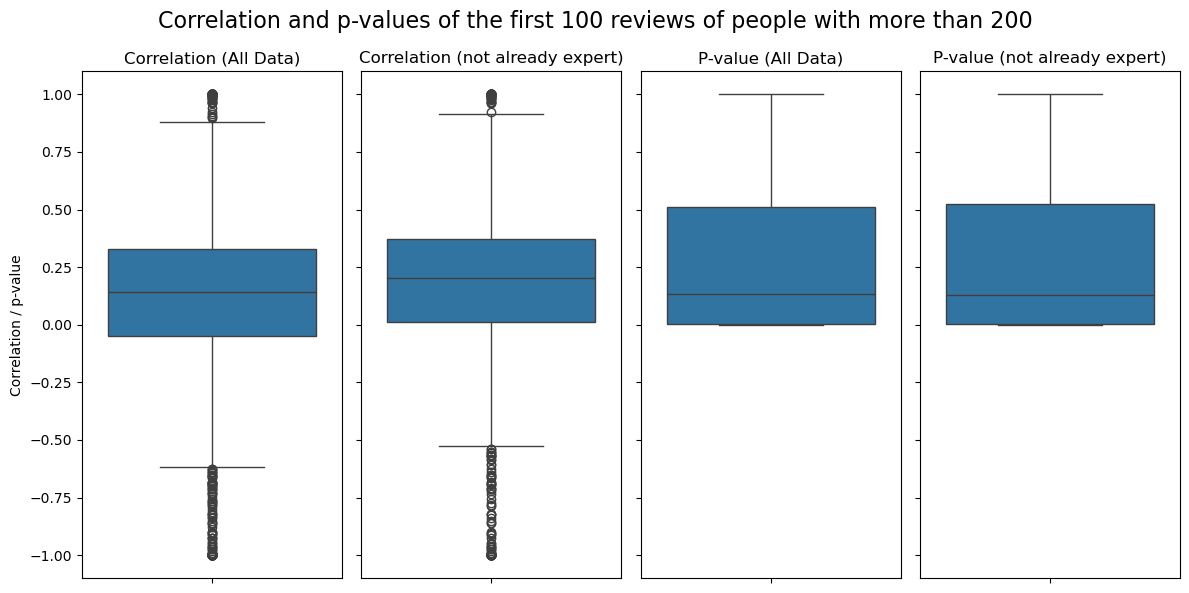

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey = True) 

fig.suptitle("Correlation and p-values of the first 100 reviews of people with more than 200", fontsize=16)
sns.boxplot(y=result['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result[result.index.isin(no_already_experts)]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (not already expert)")

sns.boxplot(y=result['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result[result.index.isin(no_already_experts)]['p_value'], ax=axes[3])
axes[3].set_title("P-value (not already expert)")

plt.tight_layout()
plt.show()

In [ ]:
result[result.index.isin(no_already_experts)].correlation.mean()

0.17618207688566326

In [ ]:
result[result.index.isin(no_already_experts)].p_value.describe()

count    2.493000e+03
mean     2.837411e-01
std      3.270868e-01
min      1.077282e-21
25%      3.136296e-03
50%      1.290119e-01
75%      5.260742e-01
max      1.000000e+00
Name: p_value, dtype: float64

## Using and incremental count instead of the date

In [ ]:

rev_exp_std = standardize(rev_with_scores, scores_for_beer.reset_index(), exp_categories)


/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


Text(0.5, 1.0, 'Expertness Score Over Time')

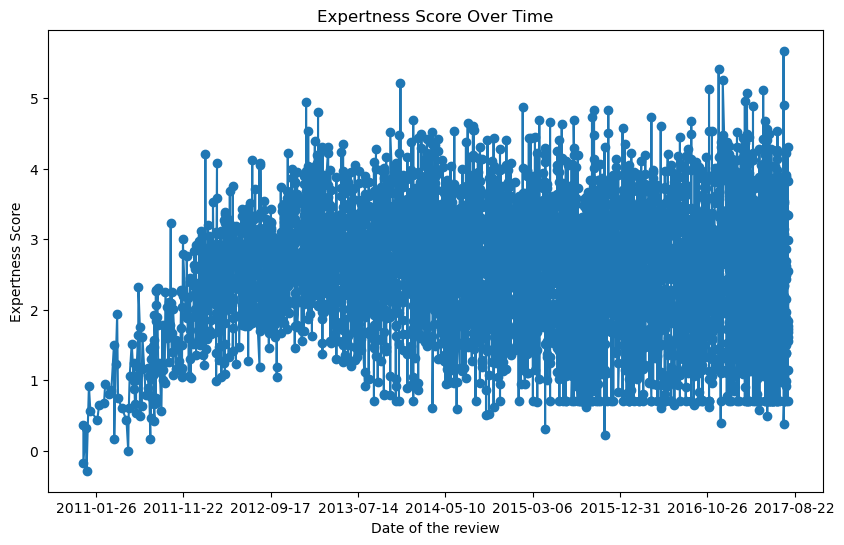

In [ ]:
# Pick specific example
rev_spec = rev_exp_std[( rev_exp_std['user_id'] =='superspak.456300')]

sorted_data = rev_spec.sort_values(by='date', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(sorted_data['date'], sorted_data['expertness_score'], marker='o', color="#1f77b4")
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
ax.set_xlabel("Date of the review")
ax.set_ylabel("Expertness Score")
ax.set_title("Expertness Score Over Time")

In [ ]:
result_rep_date = rev_exp_std.groupby('user_id').apply(lambda group: corr_and_count(group, replace_date=True), include_groups=False)
result_rep_date = result_rep_date.dropna()

In [ ]:
len(result_rep_date)

38672

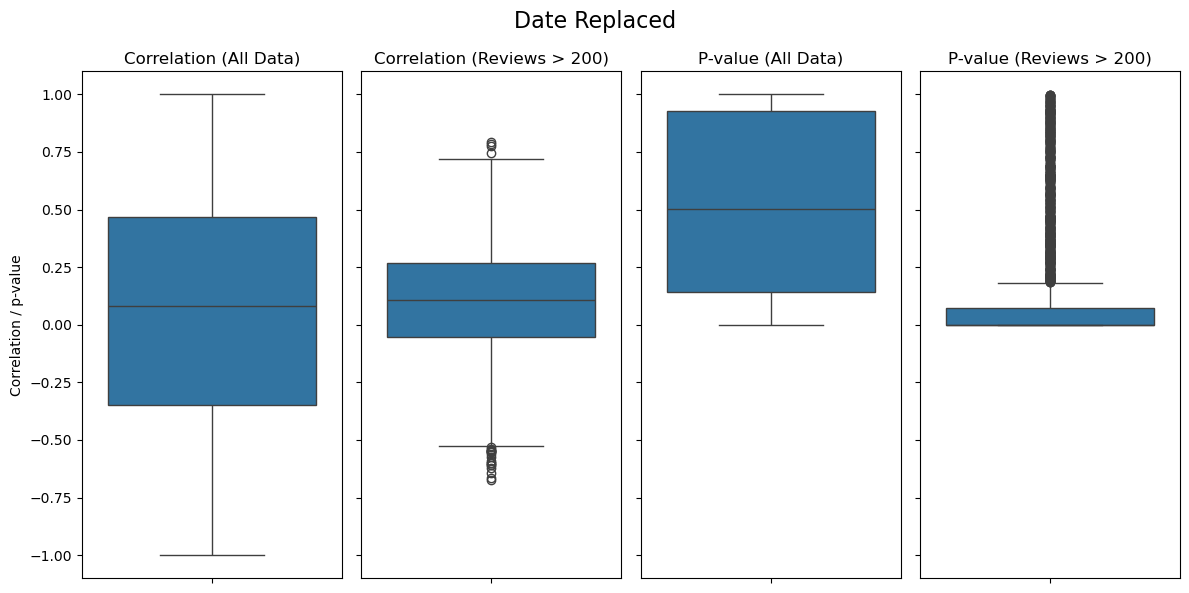

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey = True) 

fig.suptitle('Date Replaced', fontsize=16)
sns.boxplot(y=result_rep_date['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result_rep_date[result_rep_date['total_count'] > 200]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (Reviews > 200)")

sns.boxplot(y=result_rep_date['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result_rep_date[result_rep_date['total_count'] > 200]['p_value'], ax=axes[3])
axes[3].set_title("P-value (Reviews > 200)")


plt.tight_layout()  
plt.show()

In [ ]:
result_rep_date[(result_rep_date['total_count'] > 20) & (result_rep_date['total_count'] < 500)]['correlation'].mean()

0.09688471255499548

In [ ]:
result_rep_date['correlation'].mean()

0.0458133273902438

In [ ]:
rev_of_exp = review_of_experts(rev_with_scores, users, nbr_rev=200)
rev_of_exp = first_reviews(rev_of_exp, max=100)

rev_exp_std = standardize(rev_of_exp, scores_for_beer.reset_index(), exp_categories)
result_rep_date = rev_exp_std.groupby('user_id').apply(lambda group: corr_and_count(group, replace_date=True), include_groups=False)
result_rep_date = result_rep_date.dropna()

/Users/alessandrodimaria/Desktop/Ada_dataset/src/scripts/expert_analysis/analysis_helper.py:93: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  y_copy = y.drop(columns=['review_count'])


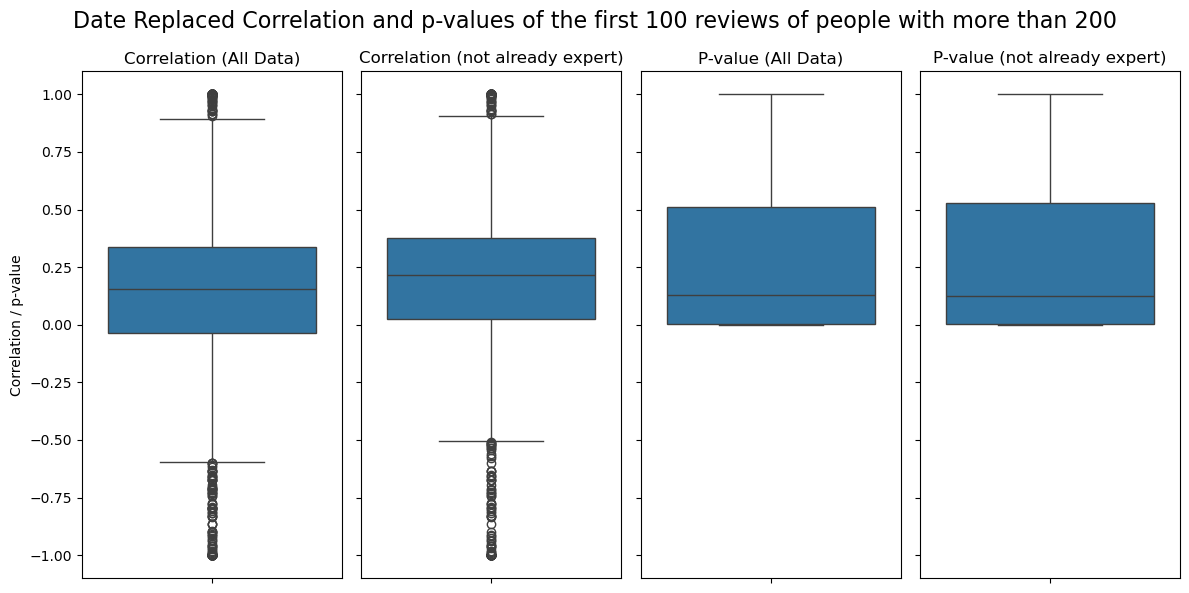

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey=True) 


fig.suptitle("Date Replaced Correlation and p-values of the first 100 reviews of people with more than 200", fontsize=16)
sns.boxplot(y=result_rep_date['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['correlation'], ax=axes[1])
axes[1].set_title("Correlation (not already expert)")

sns.boxplot(y=result_rep_date['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['p_value'], ax=axes[3])
axes[3].set_title("P-value (not already expert)")

plt.tight_layout()
plt.show()

In [ ]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].correlation.mean()

0.18715355721716442

In [ ]:
result_rep_date.correlation.mean()

0.13564570318969657

In [ ]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].p_value.describe()

count    2.503000e+03
mean     2.865210e-01
std      3.310237e-01
min      1.480821e-25
25%      2.720781e-03
50%      1.268977e-01
75%      5.303085e-01
max      1.000000e+00
Name: p_value, dtype: float64

## Avg user evolution

In [34]:
nbr_rev=150 #minimun nuber of reviews of a user for the following analysis  

In [35]:
rev_exp_std = standardize_min_max(rev_with_scores, exp_categories, by_style=True) 

In [36]:
rev_of_exp = review_of_experts(rev_exp_std, users, nbr_rev=nbr_rev)
first_rev_of_exp = first_reviews(rev_of_exp, max=5)

Text(0.5, 1.0, 'Mean of the score (standardized) of the first 5 reviews of people with more than 150')

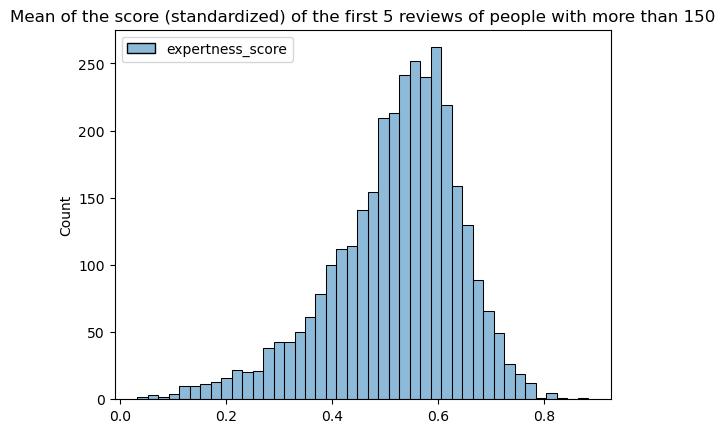

In [38]:
rev_exp_std_grouped = first_rev_of_exp.groupby('user_id')[['expertness_score']].agg('mean')
sns.histplot(rev_exp_std_grouped, color='hls')
plt.title('Mean of the score (standardized) of the first 5 reviews of people with more than %d' %(nbr_rev))

In [39]:
len(rev_exp_std_grouped)

3262

In [40]:
threshold = rev_exp_std_grouped['expertness_score'].quantile(0.2)

no_already_experts = rev_exp_std_grouped[rev_exp_std_grouped['expertness_score'] < threshold].index
len(no_already_experts)

653

In [41]:
threshold = rev_exp_std_grouped['expertness_score'].quantile(0.8)

already_experts = rev_exp_std_grouped[rev_exp_std_grouped['expertness_score'] > threshold].index
len(already_experts)

653

In [54]:
sel_rev_of_exp = first_reviews(rev_of_exp, max=50)
result_rep_date = sel_rev_of_exp.groupby('user_id').apply(lambda group: corr_and_count(group, replace_date=True), include_groups=False)
result_rep_date = result_rep_date.dropna()

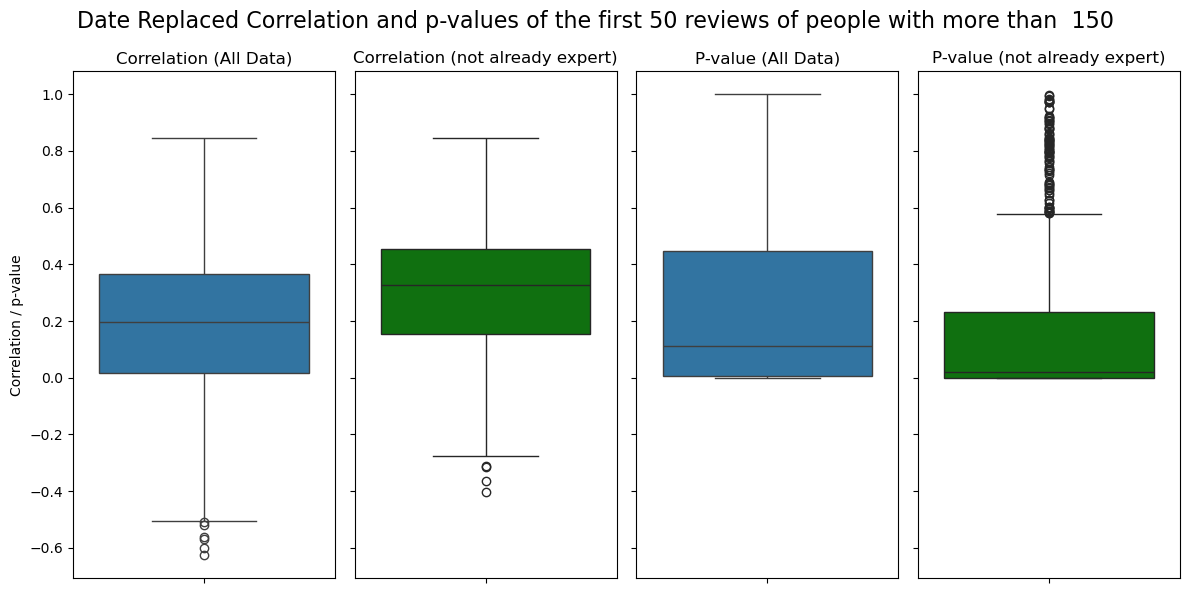

In [55]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey=True) 

fig.suptitle("Date Replaced Correlation and p-values of the first 50 reviews of people with more than  %d" %(nbr_rev), fontsize=16)
sns.boxplot(y=result_rep_date['correlation'], ax=axes[0])
axes[0].set_title("Correlation (All Data)")
axes[0].set_ylabel("Correlation / p-value")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['correlation'], ax=axes[1], color = 'green')
axes[1].set_title("Correlation (not already expert)")

sns.boxplot(y=result_rep_date['p_value'], ax=axes[2])
axes[2].set_title("P-value (All Data)")

sns.boxplot(y=result_rep_date[result_rep_date.index.isin(no_already_experts)]['p_value'], ax=axes[3], color = 'green')
axes[3].set_title("P-value (not already expert)")

plt.tight_layout()
plt.show()

In [56]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].correlation.median()

0.32557021733715247

In [57]:
result_rep_date[result_rep_date.index.isin(no_already_experts)].p_value.describe()

count    6.530000e+02
mean     1.720670e-01
std      2.712395e-01
min      9.749198e-15
25%      8.826613e-04
50%      1.953816e-02
75%      2.311100e-01
max      9.976403e-01
Name: p_value, dtype: float64

In [58]:
rev_of_exp = review_of_experts(rev_exp_std, users, nbr_rev=nbr_rev)
first_rev_of_exp = first_reviews(rev_of_exp, max=nbr_rev)

In [59]:
rev_no_al_exp = first_rev_of_exp[first_rev_of_exp.user_id.isin(no_already_experts)]
rev_no_al_exp = rev_no_al_exp.sort_values(by=['user_id', 'date'])

# Create incremental numbers for each user
rev_no_al_exp['rev_nbr'] = rev_no_al_exp.groupby('user_id').cumcount() 

rev_no_al_exp = rev_no_al_exp.drop(columns=['date'])

In [60]:
col_to_keep = ['rev_nbr']+ exp_categories
avg_no_al_exp = rev_no_al_exp[col_to_keep].groupby('rev_nbr').agg(['mean', ('sem', lambda x: x.sem())])


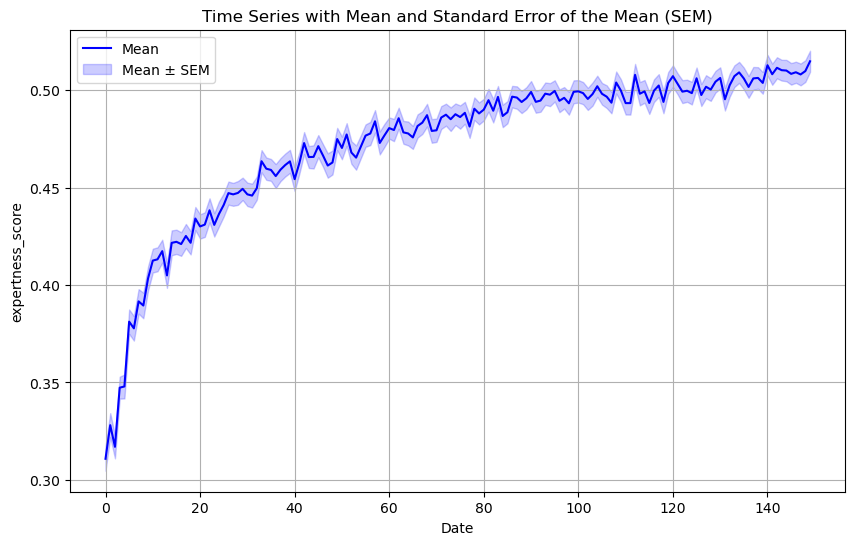

In [61]:
# Plot mean and SEM
plt.figure(figsize=(10, 6))

# Plot the mean
plt.plot(avg_no_al_exp.index, avg_no_al_exp['expertness_score']['mean'], label='Mean', color='blue')

# Plot the SEM as a shaded area
plt.fill_between(
    avg_no_al_exp.index,
    avg_no_al_exp['expertness_score']['mean'] - avg_no_al_exp['expertness_score']['sem'],
    avg_no_al_exp['expertness_score']['mean'] + avg_no_al_exp['expertness_score']['sem'],
    color='blue',
    alpha=0.2,
    label='Mean ± SEM'
)

# Formatting the plot
plt.title('Time Series with Mean and Standard Error of the Mean (SEM)')
plt.xlabel('Date')
plt.ylabel('expertness_score')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# English and non English countries / expert and non expert

In [62]:
complete_exp_rev = pd.merge(first_rev_of_exp, users[['user_id', 'location']], on='user_id')
complete_exp_rev = complete_exp_rev.sort_values(by=['user_id', 'date'])

# Create incremental numbers for each user
complete_exp_rev['rev_nbr'] = complete_exp_rev.groupby('user_id').cumcount() 
complete_exp_rev['location'] = complete_exp_rev['location'].str.replace(r'United States, .*', 'United States', regex=True)

In [63]:
no_eng_countries = ['Italy', 'Spain', 'Germany', 'France', 'Poland', 'Belgium', 'Estonia', 'Austria', 'Croatia', 'Hungary', 'Switzerland']

eng_countries = ['United States', 'England', 'Northern Ireland', 'Australia', 'Canada']

In [66]:
print(len(complete_exp_rev[complete_exp_rev['location'].isin(no_eng_countries)& complete_exp_rev['user_id'].isin(already_experts)])/nbr_rev)
print(len(complete_exp_rev[complete_exp_rev['location'].isin(eng_countries) & complete_exp_rev['user_id'].isin(already_experts)])/nbr_rev)
print(len(complete_exp_rev[complete_exp_rev['location'].isin(no_eng_countries)& complete_exp_rev['user_id'].isin(no_already_experts)])/nbr_rev)
print(len(complete_exp_rev[complete_exp_rev['location'].isin(eng_countries) & complete_exp_rev['user_id'].isin(no_already_experts)])/nbr_rev)

13.0
601.0
8.0
602.0


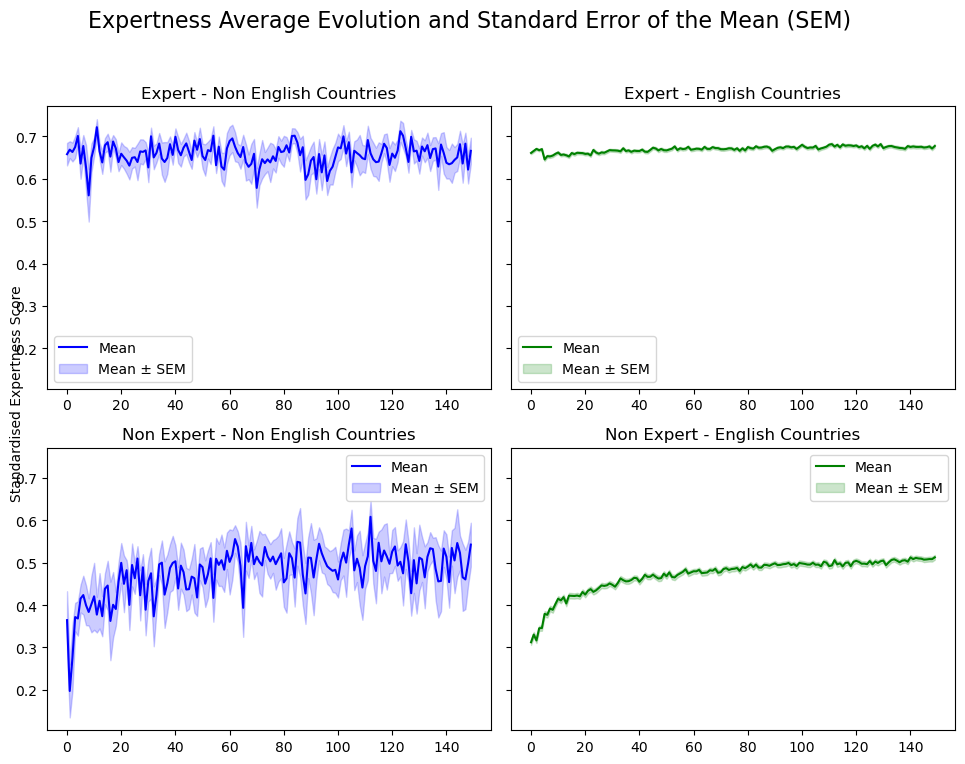

In [65]:
col_to_keep = ['rev_nbr'] + exp_categories

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=True)

fig.suptitle(
    "Expertness Average Evolution and Standard Error of the Mean (SEM)", 
    fontsize=16
)

for i, ax in enumerate(axes.flatten()): 
    if i == 0:
        rev_selected = complete_exp_rev[
            complete_exp_rev['location'].isin(no_eng_countries) & 
            complete_exp_rev['user_id'].isin(already_experts)
        ]
        sub_title = "Expert - Non English Countries"
    elif i == 1:
        rev_selected = complete_exp_rev[
            complete_exp_rev['location'].isin(eng_countries) & 
            complete_exp_rev['user_id'].isin(already_experts)
        ]
        sub_title = "Expert - English Countries"
    elif i == 2:
        rev_selected = complete_exp_rev[
            complete_exp_rev['location'].isin(no_eng_countries) & 
            complete_exp_rev['user_id'].isin(no_already_experts)
        ]
        sub_title = "Non Expert - Non English Countries"
    else:
        rev_selected = complete_exp_rev[
            complete_exp_rev['location'].isin(eng_countries) & 
            complete_exp_rev['user_id'].isin(no_already_experts)
        ]
        sub_title = "Non Expert - English Countries"

    color = 'blue' if i % 2 == 0 else 'green'

    avg_rev = rev_selected[col_to_keep].groupby('rev_nbr').agg(['mean', ('sem', lambda x: x.sem())])


    ax.plot(
        avg_rev.index, 
        avg_rev['expertness_score']['mean'], 
        label='Mean', 
        color=color
    )
    ax.fill_between(
        avg_rev.index,
        avg_rev['expertness_score']['mean'] - avg_rev['expertness_score']['sem'],
        avg_rev['expertness_score']['mean'] + avg_rev['expertness_score']['sem'],
        color=color,
        alpha=0.2,
        label='Mean ± SEM'
    )

    ax.set_title(sub_title)
    ax.legend()

fig.text(0.04, 0.5, 'Standardised Expertness Score', va='center', rotation='vertical')

plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])  # Add space for suptitle and y-axis label
plt.show()
